In [ ]:
import os
import PIL.Image as piImg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mp
import shutil

In [ ]:
base_url = 'C:/Users/M/siva/apple_orange'

In [ ]:
train_dir = os.path.join(base_url, 'train')
test_dir = os.path.join(base_url, 'test')

In [ ]:
os.mkdir(train_dir)
os.mkdir(test_dir)

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'C:/Users/M/siva/apple_orange\\train'

In [ ]:
train_orange_dir = os.path.join(train_dir, 'orange')
train_apple_dir = os.path.join(train_dir, 'apple')
test_orange_dir = os.path.join(test_dir, 'orange')
test_apple_dir = os.path.join(test_dir, 'apple')

In [ ]:
os.mkdir(train_orange_dir)
os.mkdir(train_apple_dir)
os.mkdir(test_orange_dir)
os.mkdir(test_apple_dir)

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'C:/Users/M/siva/apple_orange\\train\\orange'

In [ ]:
strawberry_files = os.listdir(base_url + '/orange')
apple_files = os.listdir(base_url + '/apple')[:400]

In [ ]:
print(len(strawberry_files), len(apple_files))

400 400


In [ ]:
for f in strawberry_files[:400]:
    shutil.copy(base_url + '/orange/' + f, train_orange_dir)
for f in strawberry_files[400:]:
    shutil.copy(base_url + '/orange/' + f, test_orange_dir)

for f in apple_files[:400]:
    shutil.copy(base_url + '/apple/' + f, train_apple_dir)
for f in apple_files[400:]:
    shutil.copy(base_url + '/apple/' + f, test_apple_dir)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

import numpy as ny
import matplotlib.pyplot as plt
import os

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./400)
val_datagen = ImageDataGenerator(rescale=1./400)

In [ ]:
train_data_importer = train_datagen.flow_from_directory(
    'C:/Users/M/siva/apple_orange/train',
    target_size=(250, 250),
    batch_size=35,
    class_mode='binary'
)

val_data_importer = train_datagen.flow_from_directory(
    'C:/Users/M/siva/apple_orange/test',
    target_size=(250, 250),
    batch_size=35,
    class_mode='binary'
)

Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(250,250,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 248, 248, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 124, 124, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 122, 122, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 61, 61, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 59, 59, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 29, 29, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 53824)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │       3,444,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,475,793 (13.26 MB)

 Trainable params: 3,475,793 (13.26 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(250, 250, 3)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

model_dir = './model/'
if not os.path.exists(model_dir):
  os.mkdir(model_dir)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.keras'
checkpoint = ModelCheckpoint(filepath=modelpath, monitor='val_loss', save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
hist = model.fit(
    train_data_importer,
    epochs=50,
    validation_data=val_data_importer,
    callbacks=[checkpoint, early_stopping_callback]
)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 270ms/step - accuracy: 0.5846 - loss: 10.0466 - val_accuracy: 0.8200 - val_loss: 0.3840
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 247ms/step - accuracy: 0.8333 - loss: 0.3993 - val_accuracy: 0.8988 - val_loss: 0.2756
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 246ms/step - accuracy: 0.9201 - loss: 0.2289 - val_accuracy: 0.9187 - val_loss: 0.2071
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 242ms/step - accuracy: 0.9059 - loss: 0.2671 - val_accuracy: 0.9237 - val_loss: 0.2100
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 262ms/step - accuracy: 0.9029 - loss: 0.2505 - val_accuracy: 0.9300 - val_loss: 0.1960
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 259ms/step - accuracy: 0.9239 - loss: 0.2039 - val_accuracy: 0.9400 - val_loss: 0.1676
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 274ms/step - accuracy: 0.9507 - loss: 0.1453 - val_accuracy: 0.9463 - val_loss: 0.1465
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 229ms/step - accuracy: 0.8983 - loss: 0.2275 - val_accuracy: 0

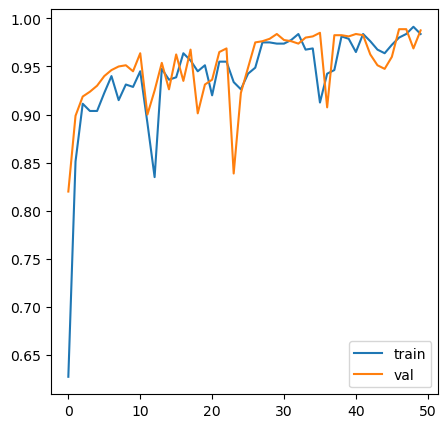

In [ ]:
fig = plt.figure(figsize=(,5))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['train', 'val'])
plt.show()